In [1]:
# Dependencies
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import csv
import re
from datetime import datetime as dt

In [2]:
file = "Resources/tesla_data.csv"

In [3]:
df = pd.read_csv(file, encoding="ISO-8859-1");

df[290:306]

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
290,4.0,2014.0,7/4/2014,USA,CA,Thief crashes stolen Tesla,1.0,1,-,-,...,-,-,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,NaN,Joshua Slot,NaN,NaN,NaN
291,3.0,2014.0,7/4/2014,USA,CA,Tesla rear ends stopped car,3.0,-,-,3,...,-,-,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,NaN,NaN,NaN,NaN,NaN
292,2.0,2013.0,11/2/2013,USA,CA,Tesla kills cyclist,1.0,-,-,-,...,-,-,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,NaN,NaN,NaN,NaN,NaN
293,1.0,2013.0,4/2/2013,USA,CA,Tesla veers into opposite lane,2.0,-,-,2,...,-,-,https://web.archive.org/web/20150425055520/ht...,https://web.archive.org/web/20150425055520/ht...,https://web.archive.org/web/20150425055520/ht...,NaN,Alberto Casique-Salinas,Armando Garcia-Gonzales,NaN,NaN
294,NaN,NaN,NaN,NaN,NaN,NaN,92.0,28,7,29,...,3,3,Abroad,NaN,Abroad,NaN,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN,NaN,NaN,261.0,89,41,101,...,16,24,USA,NaN,USA,NaN,NaN,NaN,NaN,NaN
296,NaN,NaN,NaN,NaN,NaN,NaN,353.0,117,48,130,...,19,27,Total,NaN,Total,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=df[0:294].copy()

In [5]:
df

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,5.0,2014.0,7/14/2014,USA,CA,Tesla kills motorcyclist,1.0,-,-,1,...,-,-,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,NaN,NaN,NaN,NaN,NaN
290,4.0,2014.0,7/4/2014,USA,CA,Thief crashes stolen Tesla,1.0,1,-,-,...,-,-,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,NaN,Joshua Slot,NaN,NaN,NaN
291,3.0,2014.0,7/4/2014,USA,CA,Tesla rear ends stopped car,3.0,-,-,3,...,-,-,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,NaN,NaN,NaN,NaN,NaN
292,2.0,2013.0,11/2/2013,USA,CA,Tesla kills cyclist,1.0,-,-,-,...,-,-,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Year                                                                  294 non-null    float64
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          294 non-null    object 
 6    Deaths                                                               294 non-null    float64
 7  

In [7]:
df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 '],
      dtype='object')

In [8]:
new_df = df.drop(['Case #','Year','Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 '], axis=1)
new_df.head()

,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-
1,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-,-
2,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-,-
3,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-,-
4,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-,-


In [9]:
new_df.columns

Index(['Date', ' Country ', ' State ', ' Description ', ' Deaths ',
       ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '],
      dtype='object')

In [10]:
# Remove white spaces in column names
new_df = new_df.rename(columns=lambda x: x.strip())

# Rename the columns
new_df.rename(columns={" Country ":"Country", 
                       " State" :"State", 
                       " Description ":"Description",
                       " Deaths ":"Deaths", 
                       " Other vehicle ":"Other Vehicle",
                       " Cyclists/ Peds ":"Cyclists/ Peds", 
                       " TSLA+cycl / peds ":"TSLA+cycl / peds", 
                       " Model ":"Model",
                        "Tesla driver": "Driver",
                        "Tesla occupant": "Occupant",  
                        "Autopilot claimed": "Autopilot",
                        "Verified Tesla Autopilot Deaths": "Autopilot Deaths",
                        "Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO": "Autopilot Deaths & Reported Deaths"
})
new_df.columns


Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla driver',
       'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds',
       'Model', 'Autopilot claimed', 'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'],
      dtype='object')

In [6]:
# new_df.dropna()

In [11]:
# change Date column data to acceptable format
new_df['Date']=pd.to_datetime(new_df['Date'])
new_df['Tesla driver']=new_df['Tesla driver'].astype(int,errors='ignore')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date                                                                294 non-null    datetime64[ns]
 1   Country                                                             294 non-null    object        
 2   State                                                               294 non-null    object        
 3   Description                                                         294 non-null    object        
 4   Deaths                                                              294 non-null    float64       
 5   Tesla driver                                                        289 non-null    object        
 6   Tesla occupant                                            

In [13]:
new_df[:1]

,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,2023-01-17,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-


In [14]:
# Defining a function to get year
def getYear(DOJ):
    return(DOJ.strftime('%Y'))

# extract year in the year column
new_df['Year']=new_df['Date'].apply(getYear)

In [15]:
# # Defining a function to get month
# def getMonth(DOJ):
#     return(DOJ.strftime('%MM'))

# # extract year in the year column
# new_df['Month']=new_df['Date'].apply(getMonth)

# extract month in a new column
new_df['Month'] = new_df['Date'].dt.month
new_df.head()

,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Year,Month
0,2023-01-17,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-,2023,1
1,2023-01-07,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-,-,2023,1
2,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-,-,2023,1
3,2022-12-22,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-,-,2022,12
4,2022-12-19,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-,-,2022,12


In [16]:
new_df=new_df[['Date', 'Year', 'Month', 'Country', 'State', 'Description', 'Deaths', 'Tesla driver',
       'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds',
       'Model', 'Autopilot claimed', 'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'
       ]]

In [17]:
new_df.columns


Index(['Date', 'Year', 'Month', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'],
      dtype='object')

In [18]:
word_df=new_df[['Description']]
word_df.head()

,Description
0,Tesla crashes into back of semi
1,Tesla crashes
2,"Tesla hits pole, catches on fire"
3,Tesla crashes and burns
4,Tesla crashes into storefront


In [19]:
word_df.to_csv('description.csv')

In [ ]:
# description_df = pd.read_csv('description.csv')
# comment_words = ''
# stopwords = set(STOPWORDS)
 
# # iterate through the csv file
# for val in description_df.Description:
     
#     # typecaste each val to string
#     val = str(val)
 
#     # split the value
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
 
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
 
# # plot the WordCloud image                      
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
 
# plt.show()

In [20]:
with open('stopwords.txt', 'w') as f:
    f.write('tesla')

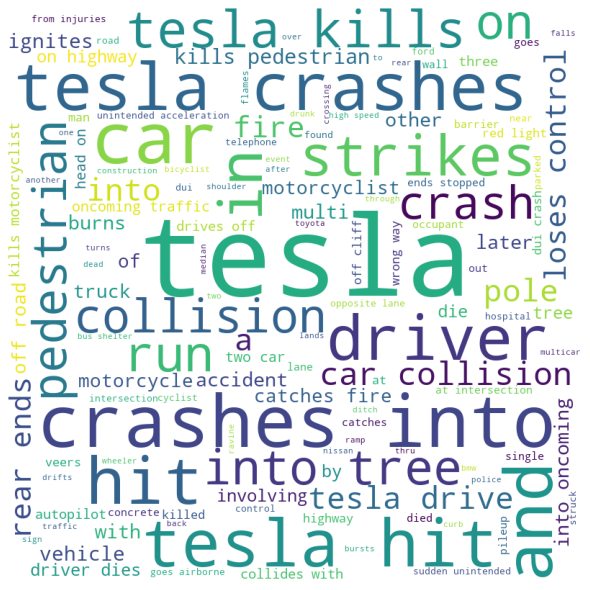

In [22]:
description_df = pd.read_csv('description.csv')
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in description_df.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = 'stopwords.txt',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

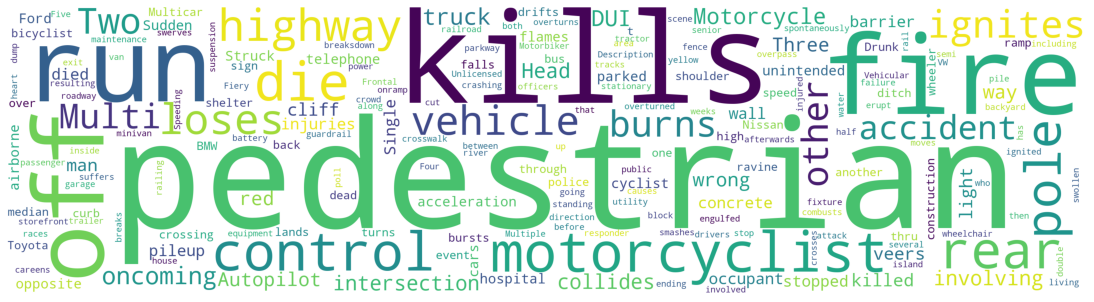

In [23]:
## remove common words like tesla, road etc. from the wordcloud, to make the output wordcloud more meaningful

# file object is created
file_ob = open(r"description.csv")
 
# reader object is created
reader_ob = csv.reader(file_ob)
 
# contents of reader object is stored .
# data is stored in list of list format.
reader_contents = list(reader_ob)
 
# empty string is declare
text = ""
 
# iterating through list of rows
for row in reader_contents :
     
    # iterating through words in the row
    for word in row :
 
        # concatenate the words
        text = text + " " + word
 
wordcloud = WordCloud(width = 3000, height = 800,collocations=False,
                background_color ='white', min_font_size = 10,
            stopwords=["tesla","road", "tree","trees","driver","hit","hits","his","suffer","out","facility","days","to","from","near","after","at","drive","drives","car","crash","into", "crashes","strike","and","on","of","in","by","ends","catches","later","found","traffic","lane","with","a","goes","strikes", "collision"]).generate(text)
 
# plot the WordCloud image
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.margins(x=0, y=0)
# plt.show()
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
#use re library to search the descrition column string with a list of strings and identify categories of accidents like fire, motorcycles, pile ups, etc.
# create new columns for these categories and assign values 1 or 0 in line with other data columns

In [36]:
my_list=['fire', 'burn','burns','burned', 'ignite','ignites','ignited', 'flame','flames','combusts']
pattern = '|'.join(my_list)

def pattern_searcher(search_str:str, search_list:str):

    search_obj = re.search(search_list, search_str)
    if search_obj :
#         return_str = search_str[search_obj.start(): search_obj.end()]
          return_str=1
    else:
        return_str = 0
    return return_str

new_df['fire_incident'] = new_df['Description'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern))

In [25]:
my_list1=['control']
pattern1 = '|'.join(my_list1)
def pattern_searcher(search_str:str, search_list:str):

    search_obj = re.search(search_list, search_str)
    if search_obj :
#         return_str = search_str[search_obj.start(): search_obj.end()]
          return_str=1
    else:
        return_str = 0
    return return_str

new_df['lost_control'] = new_df['Description'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern1))

In [32]:
my_list2=['pile','pileup','pile-up','multi','multicar','multi-car','multiple']
pattern2 = '|'.join(my_list2)
def pattern_searcher(search_str:str, search_list:str):

    search_obj = re.search(search_list, search_str)
    if search_obj :
          return_str=1
    else:
        return_str = 0
    return return_str

new_df['pile_ups'] = new_df['Description'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern2))

In [29]:
my_list3=['motorcycle','Motorcycle','motorcyclist','Motorcyclist','motorbiker','Motorbiker','biker','Biker']
pattern3 = '|'.join(my_list3)
def pattern_searcher(search_str:str, search_list:str):

    search_obj = re.search(search_list, search_str)
    if search_obj :
          return_str=1
    else:
        return_str = 0
    return return_str

new_df['motorcycle'] = new_df['Description'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern3))

In [81]:
my_list4=['dui', 'drink', 'impaired', 'drunk', 'drinking','DUI','Dui','Drink']
pattern4='|'.join(my_list4)

def pattern_searcher(search_str:str, search_list:str):

    search_obj = re.search(search_list, search_str)
    if search_obj :
          return_str=1
    else:
        return_str = 0
    return return_str

new_df['drinkNdrive'] = new_df['Description'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern4))

In [82]:
new_df[17:40]

,Date,Year,Month,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,fire_incident,lost_control,motorcycle,drinkNdrive,pile_ups
17,2022-11-05,2022,11,China,0,Out of control Tesla hits bicyclist and motor...,2.0,-,-,1,...,1,-,-,-,-,0,1,1,0,0
18,2022-11-04,2022,11,USA,IL,"Collision at intersection, Tesla driver dies ...",1.0,1,-,-,...,1,-,-,-,-,0,0,0,0,0
19,2022-10-19,2022,10,USA,CA,Multicar crash,1.0,1,-,-,...,1,1,-,-,-,0,0,0,0,0
20,2022-10-18,2022,10,USA,FL,"Tesla collides with minivan, engulfed by flames",4.0,1,1,2,...,2,-,-,-,-,1,0,0,0,0
21,2022-10-12,2022,10,UK,0,Tesla crashes into ditch,1.0,1,-,-,...,1,2,-,-,-,0,0,0,0,0
22,2022-10-09,2022,10,USA,CA,Tesla hits concrete block,1.0,-,1,-,...,1,-,-,-,-,0,0,0,0,0
23,2022-10-01,2022,10,USA,FL,Tesla hits tree and catches fire,1.0,1,-,-,...,1,-,-,-,-,1,0,0,0,0
24,2022-09-18,2022,9,USA,SC,"Tesla crashes into tree, ignites",2.0,1,1,-,...,2,-,-,-,-,1,0,0,0,0
25,2022-09-18,2022,9,USA,MD,Multi-car accident,1.0,-,-,1,...,-,-,-,-,-,0,0,0,0,0
26,2022-09-16,2022,9,USA,GA,Tesla loses control and crashes into bus shel...,1.0,-,-,-,...,1,-,1,-,-,0,1,0,0,0


In [42]:
new_df['Country'].unique()

array([' USA ', ' Canada ', ' China ', ' Mexico ', ' UK ', ' Germany ',
       ' Finland ', ' Australia ', ' Netherlands ', ' Switzerland ',
       ' France ', ' Denmark ', ' Belgium ', ' Portugal ',
       ' South Korea ', ' Norway ', ' Taiwan ', ' Slovenia ', ' Austria ',
       ' Ukraine ', ' Spain ', ' Holland ', ' Japan '], dtype=object)

In [69]:
# number of deaths in accidents involving Tesla by country and year
new_df.groupby(['Country','Year']).sum()[['Deaths']]

Deaths
Country       Year        
 Australia    2017     1.0
              2022     1.0
 Austria      2019     1.0
 Belgium      2020     1.0
              2021     1.0
 Canada       2015     1.0
              2018     1.0
              2019     1.0
              2020     4.0
              2022     4.0
              2023     1.0
 China        2016     1.0
              2018     1.0
              2020     2.0
              2021     7.0
              2022     9.0
 Denmark      2018     1.0
              2021     1.0
 Finland      2022     1.0
 France       2021     3.0
 Germany      2017     1.0
              2019     5.0
              2020     5.0
              2021     2.0
              2022     3.0
 Holland      2016     1.0
              2018     1.0
              2019     1.0
 Japan        2018     3.0
 Mexico       2022     1.0
 Netherlands  2020     3.0
              2021     2.0
              2022     1.0
 Norway       2017     1.0
              2018     1.0
              2019     1.0
              2020     1.0
 Portugal     2020     1.0
 Slovenia     2019     1.0
 South Korea  2020     1.0
 Spain        2019     1.0
 Switzerland  2017     1.0
              2018     1.0
              2022     1.0
 Taiwan       2019     1.0
              2020     2.0
 UK           2021     2.0
              2022     3.0
 USA          2013     3.0
              2014     6.0
              2015     4.0
              2016    14.0
              2017     7.0
              2018    12.0
              2019    37.0
              2020    27.0
              2021    57.0
              2022    92.0
              2023     2.0
 Ukraine      2019     1.0

In [46]:
# number of deaths in accidents by model
new_df.groupby(['Model']).sum()[['Deaths']]

,Deaths
Model,
1,1.0
2,1.0
3,47.0
-,219.0
S,53.0
X,19.0
Y,13.0


In [52]:
new_df.columns

Index(['Date', 'Year', 'Month', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO',
       'fire_incident', 'lost_control', 'motorcycle', 'drinkNdrive',
       'pile_ups'],
      dtype='object')

In [64]:
# replace '-' string with integer value 0 in the data so that it can be manipulated
# new_df=new_df.replace('-', '0')

new_df['Tesla driver'].str.replace(r'-','0').astype(float)


new_df.head()

,Date,Year,Month,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,fire_incident,lost_control,motorcycle,drinkNdrive,pile_ups
0,2023-01-17,2023,1,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,1,-,-,-,-,0,0,0,0,0
1,2023-01-07,2023,1,Canada,0,Tesla crashes,1.0,1,-,-,...,1,-,-,-,-,0,0,0,0,0
2,2023-01-07,2023,1,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,1,-,-,-,-,1,0,0,0,0
3,2022-12-22,2022,12,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,1,-,-,-,-,1,0,0,0,0
4,2022-12-19,2022,12,Canada,0,Tesla crashes into storefront,1.0,-,-,-,...,1,-,-,-,-,0,0,0,0,0


In [67]:
# new_df['Cyclists/ Peds']=new_df['Cyclists/ Peds'].astype(int)

new_df.value_counts('Tesla driver')

Tesla driver
 -      172
  1     117
dtype: int64

In [101]:
# Whether Tesla killed a Cyclist/Pedestrian in the accident


# new_df.groupby(['Model']).sum()[['Cyclists/ Peds']]

In [35]:
new_df.columns

Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla driver',
       'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds',
       'Model', 'Autopilot claimed', 'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO',
       'Year', 'fire_incident', 'lost control', 'pile_ups', 'motorcycle'],
      dtype='object')

In [56]:
# cases per country by model where car lost control
obj=new_df.groupby(['Country','Model']).count()[['lost_control']]
obj.head()


lost_control
Country     Model              
 Australia   -                1
             X                1
 Austria      3               1
 Belgium      3               1
             -                1

In [43]:
# new_df['Verified Tesla Autopilot Deaths']=new_df['Verified Tesla Autopilot Deaths'].astype(float,errors='ignore')
# new_df['Verified Tesla Autopilot Deaths'].convert_objects(numeric=True)


In [79]:
# cases per country by model where car caught fire
fire_df=new_df.groupby(['Country','Model']).sum()[['fire_incident']]
fire_df.head()

fire_incident
Country     Model               
 Australia   -                 0
             X                 0
 Austria      3                0
 Belgium      3                0
             -                 0

In [40]:
new_df['fire_incident'].value_counts()

0    251
1     43
Name: fire_incident, dtype: int64

In [84]:
new_df['lost_control'].value_counts()

0    280
1     14
Name: lost_control, dtype: int64

In [42]:
new_df['motorcycle'].value_counts()

0    270
1     24
Name: motorcycle, dtype: int64

In [43]:
new_df['pile_ups'].value_counts()

0    287
1      7
Name: pile_ups, dtype: int64

In [44]:
new_df['Autopilot claimed'].value_counts()

 -      241
  1      32
  2       3
Name: Autopilot claimed, dtype: int64

In [45]:
new_df['Tesla driver'].value_counts()

 -      172
  1     117
Name: Tesla driver, dtype: int64

In [46]:
new_df['Tesla occupant'].value_counts()

 -      242
  1      39
  2       3
  3       1
Name: Tesla occupant, dtype: int64

In [47]:
 new_df['Other vehicle'].value_counts()

 -      180
  1      95
  2      11
  3       3
  4       1
Name: Other vehicle, dtype: int64

In [49]:
new_df['Deaths'].value_counts()

1.0    247
2.0     38
3.0      6
4.0      3
Name: Deaths, dtype: int64

In [83]:
new_df['drinkNdrive'].value_counts()

0    286
1      8
Name: drinkNdrive, dtype: int64

In [66]:
# new_df_new = new_df['Tesla driver'].map({'NaN':0})
# new_df_new.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Tesla driver, dtype: float64

In [86]:
new_df['Month'].value_counts()

11    35
12    33
6     28
5     28
7     27
9     26
8     24
3     24
4     23
1     21
10    16
2      9
Name: Month, dtype: int64

In [87]:
new_df['drinkNdrive'].value_counts()

0    286
1      8
Name: drinkNdrive, dtype: int64

In [100]:
category_df=new_df.loc[(new_df['fire_incident']==1) & (new_df['lost_control']==1)]
# loc[(popdemo_df['Name'] == 'Richmond city') | (popdemo_df['Name'] == 'Landsdowne')]
category_df

,Date,Year,Month,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,fire_incident,lost_control,motorcycle,drinkNdrive,pile_ups
92,2022-02-07,2022,2,USA,FL,"Tesla loses control, hits pole, ignites",1.0,1,-,-,...,1,-,-,-,-,1,1,0,0,0
156,2020-12-09,2020,12,South Korea,0,Car goes out of control and crashes into a wa...,1.0,-,1,-,...,1,X,1,-,-,1,1,0,0,0


In [95]:
new_df.loc[new_df['lost_control']==1]

,Date,Year,Month,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,fire_incident,lost_control,motorcycle,drinkNdrive,pile_ups
17,2022-11-05,2022,11,China,0,Out of control Tesla hits bicyclist and motor...,2.0,-,-,1,...,1,-,-,-,-,0,1,1,0,0
26,2022-09-16,2022,9,USA,GA,Tesla loses control and crashes into bus shel...,1.0,-,-,-,...,1,-,1,-,-,0,1,0,0,0
45,2022-07-12,2022,7,China,0,Out of control Tesla hits pedestrians,2.0,-,-,-,...,2,Y,-,-,-,0,1,0,0,0
62,2022-05-28,2022,5,USA,OR,Tesla loses control and crashes into car,2.0,1,-,1,...,1,Y,-,-,-,0,1,0,0,0
92,2022-02-07,2022,2,USA,FL,"Tesla loses control, hits pole, ignites",1.0,1,-,-,...,1,-,-,-,-,1,1,0,0,0
98,2021-12-24,2021,12,China,0,Tesla loses control and drives into river,1.0,1,-,-,...,1,-,-,-,-,0,1,0,0,0
123,2021-07-23,2021,7,USA,GA,Tesla Driver loses control and hits median ba...,1.0,1,-,-,...,1,3,-,-,-,0,1,0,0,0
129,2021-06-16,2021,6,Denmark,0,"Driver loses control of car, crashes into tree",1.0,1,-,-,...,1,-,-,-,-,0,1,0,0,0
142,2021-04-03,2021,4,USA,PA,"Tesla loses control, hits railing and cut in ...",2.0,1,1,-,...,2,-,-,-,-,0,1,0,0,0
145,2021-03-20,2021,3,Belgium,0,"Driver runs over curb, loses control and hit ...",1.0,1,-,-,...,1,-,-,-,-,0,1,0,0,0
